# **Importing Libraries**

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Downloading Dataset**

* Dataset Link: https://www.kaggle.com/c/dogs-vs-cats/data
* Filtered Version: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [ ]:
zip_dir = tf.keras.utils.get_file(fname='cat_and_dog.zip',
                                  origin=URL,
                                  extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [ ]:
zip_dir

'/root/.keras/datasets/cat_and_dog.zip'

In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
zip_dir_base

'/root/.keras/datasets'

In [ ]:
!pwd

/content


In [ ]:
%cd /root/.keras/datasets/
!pwd

/root/.keras/datasets
/root/.keras/datasets


In [ ]:
!cd /root/.keras/datasets/ && ls -al

total 67012
drwxr-xr-x 3 root root     4096 Sep  7 14:53 .
drwxr-xr-x 3 root root     4096 Sep  7 14:53 ..
-rw-r--r-- 1 root root 68606236 Sep  7 14:53 cat_and_dog.zip
drwxr-xr-x 4 root root     4096 Sep  7 14:53 cats_and_dogs_filtered


In [ ]:
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


* Have a folder:
    * /root/.keras/datasets/cats_and_dogs_filtered/
    * /root/.keras/datasets/cats_and_dogs_filtered/train
    * /root/.keras/datasets/cats_and_dogs_filtered/validation



In [ ]:
zip_dir, zip_dir_base

('/root/.keras/datasets/cat_and_dog.zip', '/root/.keras/datasets')

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_dir, validation_dir

('/root/.keras/datasets/cats_and_dogs_filtered/train',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir

('/root/.keras/datasets/cats_and_dogs_filtered/train/cats',
 '/root/.keras/datasets/cats_and_dogs_filtered/train/dogs',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation/cats',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs')

In [ ]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))
total_train = num_cats_train + num_dogs_train

print(num_cats_train)
print(num_dogs_train)
print(total_train)

1000
1000
2000


In [ ]:
num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))
total_validation = num_cats_validation + num_dogs_validation

print(num_cats_validation)
print(num_dogs_validation)
print(total_validation)

500
500
1000


# **Model Parameters**

In [ ]:
BATCH_SIZE = 100
IMAGE_SHAPE = 150

# **Preparing Data**

In [ ]:
# Creating an instance of image data generator for both train and validation data

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir, validation_dir

('/root/.keras/datasets/cats_and_dogs_filtered/train',
 '/root/.keras/datasets/cats_and_dogs_filtered/validation')

In [ ]:
# Load images from directory, rescale and resize

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                           batch_size=BATCH_SIZE,
                                                           class_mode='binary',
                                                           shuffle=True)

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='binary',
                                                              shuffle=False)

Found 1000 images belonging to 2 classes.


# **Visualize**

In [ ]:
sample_train_images, _ = next(train_data_gen)

In [ ]:
sample_train_images.shape

(100, 150, 150, 3)

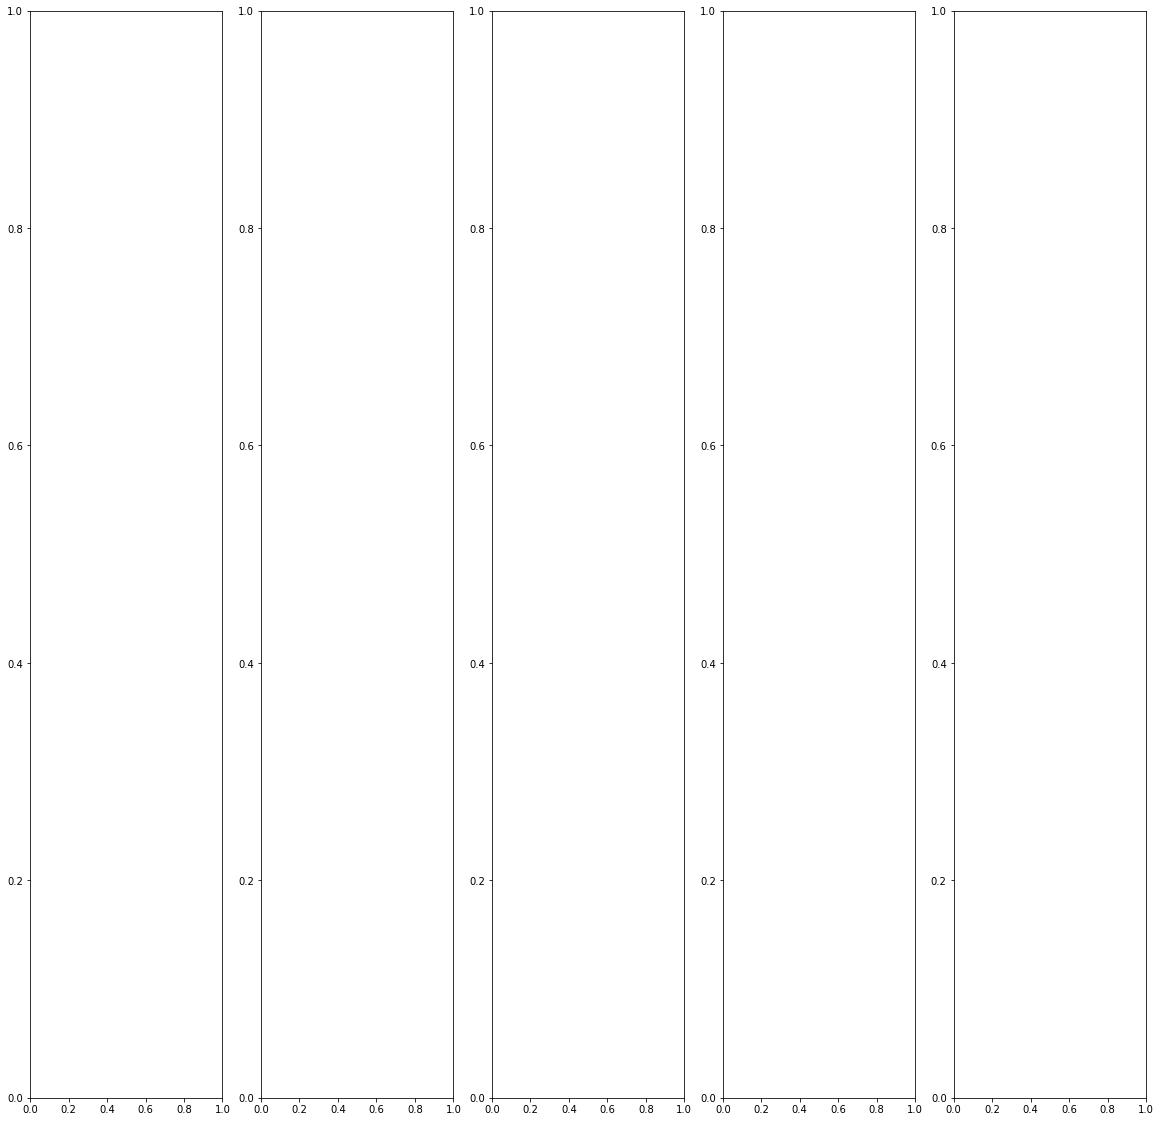

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 20))

In [ ]:
axes = axes.flatten()
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0d94fb850>,
      dtype=object)

In [ ]:
def plot_images(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
  

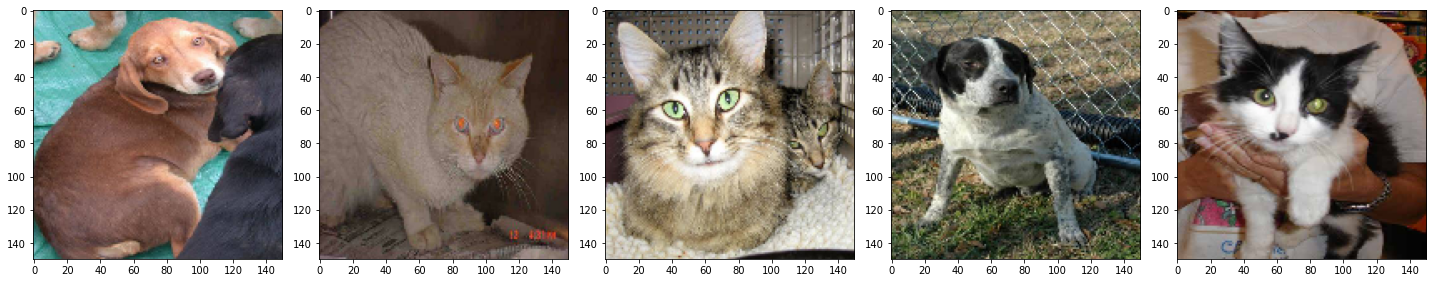

In [ ]:
plot_images(sample_train_images[:5])

# **Model Creation**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
EPOCHS = 100

In [ ]:
total_train, BATCH_SIZE

(2000, 100)

In [ ]:
total_train/BATCH_SIZE

20.0

In [ ]:
history = model.fit(train_data_gen,
                              epochs=EPOCHS,
                              steps_per_epoch=int(np.ceil(total_train/BATCH_SIZE)),
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(total_validation/BATCH_SIZE)))

Epoch 1/100
20/20 [==============================] - 11s 530ms/step - loss: 0.7099 - accuracy: 0.5175 - val_loss: 0.6906 - val_accuracy: 0.5180
Epoch 2/100
20/20 [==============================] - 10s 506ms/step - loss: 0.6765 - accuracy: 0.5830 - val_loss: 0.6466 - val_accuracy: 0.6480
Epoch 3/100
20/20 [==============================] - 10s 503ms/step - loss: 0.6399 - accuracy: 0.6415 - val_loss: 0.6463 - val_accuracy: 0.6150
Epoch 4/100
20/20 [==============================] - 10s 492ms/step - loss: 0.6028 - accuracy: 0.6710 - val_loss: 0.6619 - val_accuracy: 0.6200
Epoch 5/100
20/20 [==============================] - 10s 503ms/step - loss: 0.5799 - accuracy: 0.6980 - val_loss: 0.5956 - val_accuracy: 0.6910
Epoch 6/100
20/20 [==============================] - 10s 503ms/step - loss: 0.5403 - accuracy: 0.7255 - val_loss: 0.5989 - val_accuracy: 0.6780
Epoch 7/100
20/20 [==============================] - 10s 498ms/step - loss: 0.5069 - accuracy: 0.7545 - val_loss: 0.5610 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(val_data_gen)

10/10 [==============================] - 3s 309ms/step - loss: 2.1530 - accuracy: 0.7620


# **Visualize Result**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


In [ ]:
print(acc)

[0.5174999833106995, 0.5830000042915344, 0.6414999961853027, 0.6710000038146973, 0.6980000138282776, 0.7254999876022339, 0.7544999718666077, 0.7925000190734863, 0.7879999876022339, 0.8234999775886536, 0.8519999980926514, 0.8675000071525574, 0.9010000228881836, 0.8889999985694885, 0.9240000247955322, 0.9484999775886536, 0.9660000205039978, 0.9739999771118164, 0.9835000038146973, 0.9804999828338623, 0.9810000061988831, 0.987500011920929, 0.9965000152587891, 0.9929999709129333, 0.9950000047683716, 0.9959999918937683, 0.9994999766349792, 0.9990000128746033, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(val_acc)

[0.5180000066757202, 0.6480000019073486, 0.6150000095367432, 0.6200000047683716, 0.6909999847412109, 0.6779999732971191, 0.7300000190734863, 0.703000009059906, 0.7250000238418579, 0.7480000257492065, 0.6990000009536743, 0.7360000014305115, 0.7369999885559082, 0.734000027179718, 0.7549999952316284, 0.7429999709129333, 0.7609999775886536, 0.7409999966621399, 0.7269999980926514, 0.7289999723434448, 0.7360000014305115, 0.7519999742507935, 0.765999972820282, 0.7630000114440918, 0.7419999837875366, 0.7390000224113464, 0.7409999966621399, 0.7480000257492065, 0.7519999742507935, 0.7459999918937683, 0.7590000033378601, 0.7570000290870667, 0.7549999952316284, 0.7559999823570251, 0.7559999823570251, 0.7570000290870667, 0.7570000290870667, 0.7590000033378601, 0.7580000162124634, 0.7590000033378601, 0.7580000162124634, 0.7570000290870667, 0.7580000162124634, 0.7580000162124634, 0.7570000290870667, 0.7590000033378601, 0.7580000162124634, 0.7580000162124634, 0.7580000162124634, 0.7580000162124634, 0.

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print(loss, val_loss)

[0.7098572254180908, 0.6764938831329346, 0.6399277448654175, 0.6027730107307434, 0.5799039602279663, 0.5402693748474121, 0.5068520903587341, 0.46174484491348267, 0.44777846336364746, 0.39127781987190247, 0.3486038148403168, 0.3080633282661438, 0.24590030312538147, 0.24607796967029572, 0.19649524986743927, 0.143913134932518, 0.10397620499134064, 0.073788583278656, 0.05617010220885277, 0.05978839844465256, 0.051580656319856644, 0.03716058284044266, 0.01926792971789837, 0.02403559535741806, 0.02176867611706257, 0.013539937324821949, 0.0068247392773628235, 0.0035100404638797045, 0.0014162828447297215, 0.0008921075495891273, 0.0005123837036080658, 0.0003561889461707324, 0.0002978854754474014, 0.0002599572471808642, 0.0002341009530937299, 0.00021410605404525995, 0.00019406684441491961, 0.0001778302394086495, 0.00016489053086843342, 0.00015315419295802712, 0.00014241626195143908, 0.00013297281111590564, 0.0001237657415913418, 0.00011607394117163494, 0.0001081951631931588, 0.000101915276900399

In [ ]:
epochs_range = range(EPOCHS)

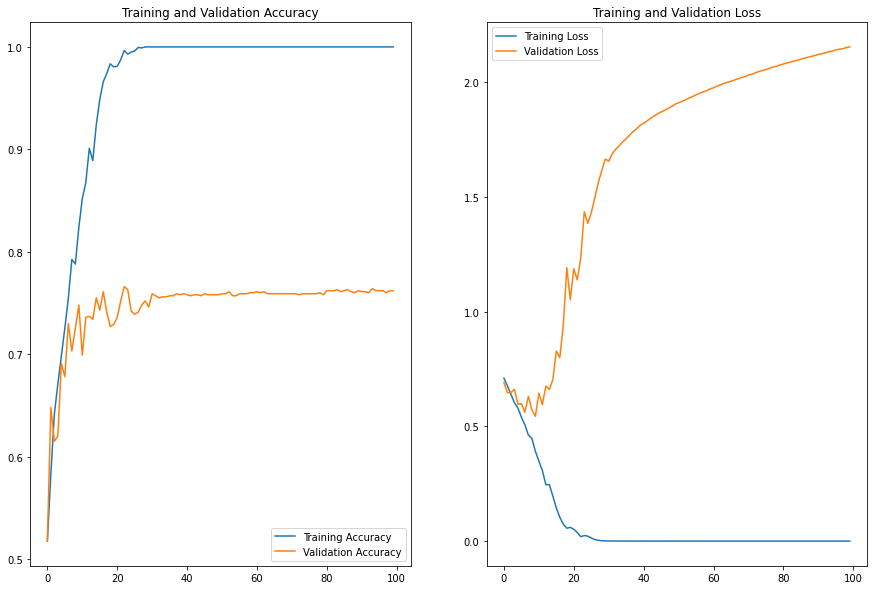

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.show()